In [1]:
from tensorflow.keras import layers , models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
noise_factor = 1
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11501568/11490434 [==============================] - 0s 0us/step


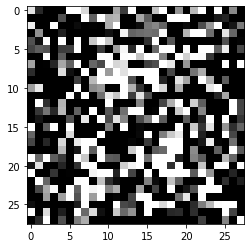

In [3]:
first_image = x_train_noisy[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

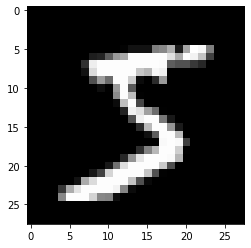

In [4]:
first_image = X_train[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [ ]:
input = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(input)
x = layers.MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = layers.Conv2D(8,(3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x)


y = layers.Conv2D(8, (3, 3), padding='same', activation='relu')(x)
y = layers.UpSampling2D((2, 2))(y)
y = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(y)
y = layers.UpSampling2D((2, 2))(y)
out = layers.Conv2D(1,(3, 3), padding='same', activation='sigmoid')(y)
autoencoder = models.Model(inputs = input, outputs = out)

In [5]:
#or, you can use a model with Conv2DTranspose layers

input = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(input)
x = layers.MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = layers.Conv2D(8,(3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x)


y = layers.Conv2DTranspose(8, (2, 2), activation='relu')(x)
y = layers.Conv2DTranspose(8, (5, 5), activation='relu')(y)
y = layers.Conv2DTranspose(8, (5, 5), activation='relu')(y)
y = layers.Conv2DTranspose(16, (5, 5), activation='relu')(y)
y = layers.Conv2DTranspose(16, (5, 5), activation='relu')(y)
out = layers.Conv2DTranspose(1, (5, 5), activation='sigmoid')(y)
autoencoder = models.Model(inputs = input, outputs = out)

In [6]:
autoencoder.compile(loss='mse', optimizer='adam') 

In [7]:
autoencoder.fit(x_train_noisy, X_train, epochs = 20, batch_size = 20, shuffle = True, validation_split = 0.2)

Epoch 1/20
2400/2400 [==============================] - 27s 5ms/step - loss: 0.0688 - val_loss: 0.0579
Epoch 2/20
2400/2400 [==============================] - 12s 5ms/step - loss: 0.0500 - val_loss: 0.0454
Epoch 3/20
2400/2400 [==============================] - 12s 5ms/step - loss: 0.0428 - val_loss: 0.0415
Epoch 4/20
2400/2400 [==============================] - 12s 5ms/step - loss: 0.0405 - val_loss: 0.0405
Epoch 5/20
2400/2400 [==============================] - 12s 5ms/step - loss: 0.0392 - val_loss: 0.0387
Epoch 6/20
2400/2400 [==============================] - 12s 5ms/step - loss: 0.0384 - val_loss: 0.0383
Epoch 7/20
2400/2400 [==============================] - 12s 5ms/step - loss: 0.0378 - val_loss: 0.0378
Epoch 8/20
2400/2400 [==============================] - 11s 5ms/step - loss: 0.0373 - val_loss: 0.0374
Epoch 9/20
2400/2400 [==============================] - 11s 5ms/step - loss: 0.0370 - val_loss: 0.0369
Epoch 10/20
2400/2400 [==============================] - 11s 5ms/step - l

In [8]:
decoded = autoencoder.predict(x_test_noisy)

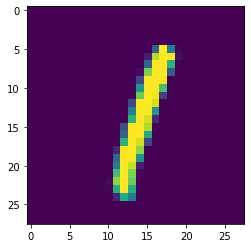

In [9]:
plt.imshow(X_test[5].reshape(28, 28))

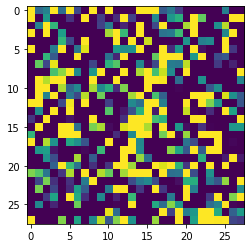

In [10]:
plt.imshow(x_test_noisy[5].reshape(28, 28))

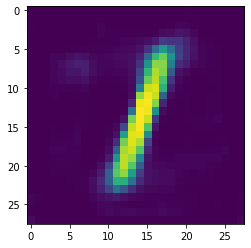

In [11]:
plt.imshow(decoded[5].reshape(28, 28))

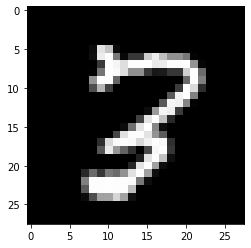

In [12]:
plt.imshow(X_test[578].reshape(28, 28), cmap='gray')

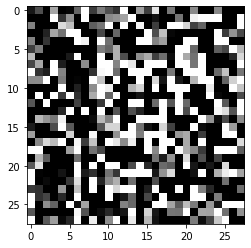

In [13]:
plt.imshow(x_test_noisy[578].reshape(28, 28), cmap='gray')

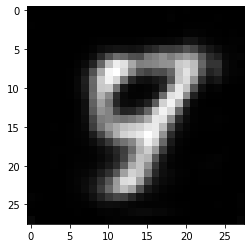

In [14]:
plt.imshow(decoded[578].reshape(28, 28), cmap='gray')